In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
def cleanfirstquarter(x):
    
    #Change characters to lower case
    lst = []
    for col in x.columns:
        lst.append(col.lower())
    x.columns = lst

    #Deal with nan values
    x['months since last claim'] = x['months since last claim'].fillna(x['months since last claim'].mean())
    x['state'] = x['state'].fillna('U')
    x['response'] = x['response'].fillna('No')
    x['number of open complaints'] = x['number of open complaints'].fillna(0)
    x['vehicle class'] = x['vehicle class'].fillna('U')
    x['vehicle size'] = x['vehicle size'].fillna('U')
    x['vehicle type'] = x['vehicle size'].fillna('U')

    #change column to datetime and extract month
    x['effective to date'] = pd.to_datetime(x['effective to date'], errors='coerce')
    x['month'] = pd.DatetimeIndex(x['effective to date']).month
    x['month'] = x['month'].astype(int)
    filt = x[(x['month'].isin([1,2,3]))]
     
    #Check for unnamed 0 columns, if it's there, drop it
    for i in filt.columns:
        if i == 'unnamed: 0':
            filt.drop(columns = 'unnamed: 0', inplace=True)
    return filt

In [3]:
df1 = pd.read_csv('/Users/kitchphil/Labs-Ironhack/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
df1 = cleanfirstquarter(df1)
df1.head(3)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,Medsize,2


In [4]:
df2 = pd.read_csv('csv_files/marketing_customer_analysis.csv')
df2 = cleanfirstquarter(df2)
df2

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,Large,2


In [5]:
display(df1.shape)
display(df2.shape)

(10910, 26)

(9134, 26)

In [6]:
#show dataframe info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

In [7]:
#Describe the dataframe
df2.describe(include='all').T

/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_1700/1384746414.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
customer,9134,9134,BU79786,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,9134,5,California,3150,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer lifetime value,9134.0,NaN,NaN,NaN,NaT,NaT,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
response,9134,2,No,7826,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,9134,3,Basic,5568,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,9134,5,Bachelor,2748,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective to date,9134,59,2011-01-10 00:00:00,195,2011-01-01,2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,9134,5,Employed,5698,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,9134,2,F,4658,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,9134.0,NaN,NaN,NaN,NaT,NaT,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


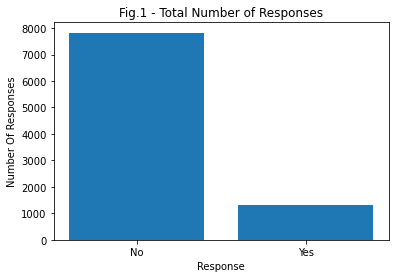

In [8]:
plt.bar(['No','Yes'], [df2['response'].value_counts()['No'],df2['response'].value_counts()['Yes']] )
plt.xlabel('Response')
plt.ylabel('Number Of Responses')
plt.title('Fig.1 - Total Number of Responses')
plt.show()

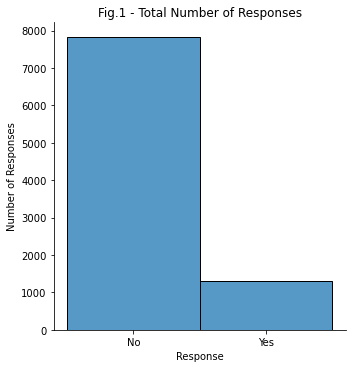

In [9]:
responsebar = sns.displot(df2['response'])
responsebar.set(title='Fig.1 - Total Number of Responses')
responsebar.set(xlabel= "Response", ylabel="Number of Responses")

[Text(0.5, 1.0, 'Fig 2. Response Rate By Sales Channel'),
 Text(0.5, 0, 'Sales Channel'),
 Text(0, 0.5, 'Responses')]

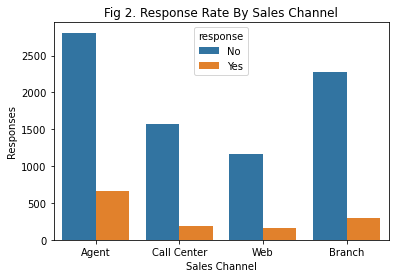

In [10]:
sns.countplot(data=df2, x='sales channel', hue='response').set(title='Fig 2. Response Rate By Sales Channel', xlabel='Sales Channel', ylabel='Responses')

In [11]:
#Transform the Boolean Values to 1 & 0
df2['response_rate'] = np.where(df2.response=='Yes',1,0)

In [ ]:
df2['response_rate'] = df2['response_rate']*100


In [ ]:
p = sns.barplot(data=df2, x='sales channel', y='response_rate')
p.set_xlabel("Sales Channel", fontsize = 12)
p.set_ylabel("Response Rate", fontsize = 12)
p.set(title='Fig. 2 - Response Rate by Sales Channel')

In [ ]:
sns.displot(data = df2, x='total claim amount', bins=20, hue='response', palette=["#ff0000", "#1065c0"], multiple='stack', kde=True).set(title='Fig. 3 - Response Rate by Total Claim Amount', xlabel='Total Claim Amount', ylabel = 'Number of Responses')
plt.show()

In [ ]:
f  = sns.boxplot(x = 'response_rate',y='total claim amount', data=df2, hue='response_rate', palette=["#ff0000", "#1065c0"]).set(title='Fig. 3 - Response Rate by Total Claim Amount', xlabel='Total Claim Amount', ylabel = 'Number of Responses')
plt.legend([],[], frameon=False)

In [ ]:
sns.displot(data = df2, x='income', bins=20, hue='response', palette=["#ff0000", "#1065c0"], multiple='stack', kde=True).set(title='Fig. 4 - Response Rate by Income', xlabel='Income', ylabel = 'Response Rate')
plt.show()